## Propensity Score

In [208]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/metrics_ps.png")

In [220]:
!ls ../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/

TrivagoLogisticModelInteraction_selu____epsilon_greedy_1b3311b7c5_1d48a03ac3_ps_model
TrivagoLogisticModelInteraction_selu____epsilon_greedy_1b3311b7c5_7fd41d5632_ps_model
TrivagoLogisticModelInteraction_selu____epsilon_greedy_1b3311b7c5_c843aac27a_ps_model
TrivagoLogisticModelInteraction_selu____epsilon_greedy_d192bd143d_a33b7a8a7c_ps_model
TrivagoLogisticModelInteraction_selu____softmax_explorer_ecf6ca42ee_5c632bf30d_ps_per_logistic_regression_of_pos_item_idx_and_item_ps
TrivagoLogisticModelInteraction_selu____softmax_explorer_ecf6ca42ee_756c352631_ps_per_logistic_regression_of_pos_item_idx_and_item_ps
TrivagoLogisticModelInteraction_selu____softmax_explorer_ecf6ca42ee_89372c6587_ps_per_logistic_regression_of_pos_item_idx_and_item_ps
TrivagoLogisticModelInteraction_selu____softmax_explorer_ecf6ca42ee_adc93c267a_ps_per_item_in_first_pos
TrivagoLogisticModelInteraction_selu____softmax_explorer_ecf6ca42ee_c77d82b7ff_ps_per_logistic_regression_of_pos_item_idx_and_item
TrivagoLogisticMode

In [221]:
# BCE
df_bce = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_2f3d4a7009_1d904d1044_ps_model/df_offpolicy.csv').compute()

# CRM
df_crm = dd.read_csv('../../deep-reco-gym/output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_57eb2a07b1_919750b420_ps_model/df_offpolicy.csv').compute()


df_crm['ps_i'] = df_crm.apply(lambda row: int(row['item_idx'] == row['item_idx_action']), axis=1)
df_bce['ps_i'] = df_bce.apply(lambda row: int(row['item_idx'] == row['item_idx_action']), axis=1)

df = df_bce
df.head()


,timestamp,timestamp_diff,step,user_idx,session_idx,city_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,...,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,action_rhat_rewards,item_idx_rhat_rewards,ps_eval,ps_i
0,1541455183,15414545023,14.0,194,632,0,2.0,138,2,"[1, 1, 3, 8, 1, 1, 3, 9, 9, 8]",...,1,1,3,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",366,0.0,0.030148,0.029993,0.0,0
1,1541455183,15414545023,14.0,194,632,0,2.0,138,2,"[1, 1, 3, 8, 1, 1, 3, 9, 9, 8]",...,1,1,3,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",366,0.0,0.028415,0.011063,0.0,0
2,1541455183,15414545023,14.0,194,632,0,2.0,138,2,"[1, 1, 3, 8, 1, 1, 3, 9, 9, 8]",...,1,1,3,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",366,0.0,0.036735,0.007912,0.0,0
3,1541455765,0,NaN,122,806,0,0.0,33,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,3,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",366,0.0,0.029775,0.024616,0.0,0
4,1541455765,0,NaN,122,806,0,0.0,33,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,1,1,3,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",366,0.0,0.034460,0.021789,0.0,0


## IPS

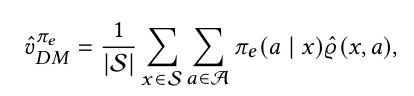

In [222]:
from IPython.display import Image
Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-26.png")


In [223]:
df_hit_crm = df_crm[(df_crm.ps_i == 1) & (df_crm.rewards == 1)]
df_hit_crm.shape

(85, 251)

In [224]:
df_hit_bce = df_bce[(df_bce.ps_i == 1) & (df_bce.rewards == 1)]
df_hit_bce.shape

(135, 251)

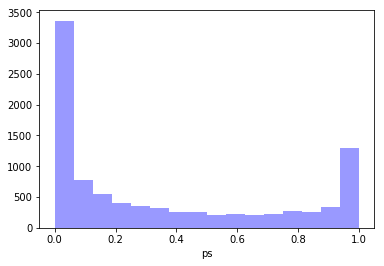

In [225]:
d1 = df_bce['ps']
sns.distplot(d1, kde=False, color="b")

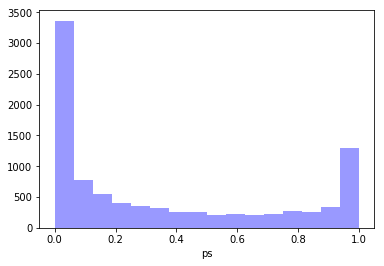

In [226]:
d1 = df_crm['ps']
sns.distplot(d1, kde=False, color="b")

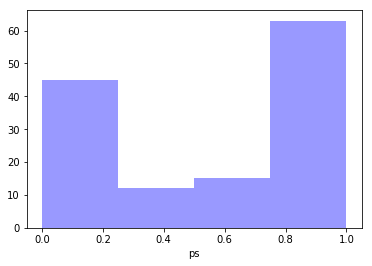

In [227]:
d1 = df_hit_bce['ps']
sns.distplot(d1, kde=False, color="b")

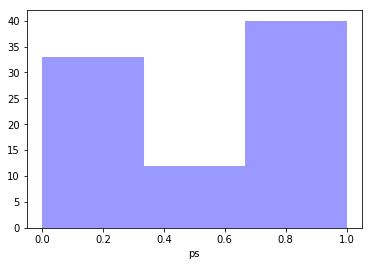

In [228]:
d2 = df_hit_crm['ps']
sns.distplot(d2, kde=False, color="b")

In [219]:
print("BCE:", len(d1), np.mean(d1))
print("CRM:", len(d2), np.mean(d2))

BCE: 135 0.058804434127415775
CRM: 127 0.056438730490635934


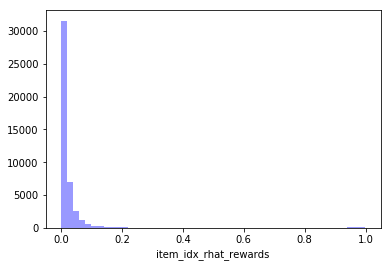

In [154]:
d1 = df_crm.item_idx_rhat_rewards
sns.distplot(d1, kde=False, color="b")

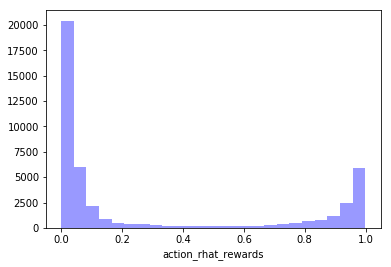

In [155]:
d2 = df_crm.action_rhat_rewards
sns.distplot(d2, kde=False, color="b")

# DirectEstimator

In [ ]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-26.png")


In [159]:
_df[['item_idx', 'item_idx_action', 'rewards']].head()

NameError: name '_df' is not defined

In [ ]:
d1 = _df['item_idx_rhat_rewards']#.compute()
sns.distplot(d1, kde=False, color="b")

In [160]:
np.mean(d1), np.mean(_df['rewards'])

NameError: name '_df' is not defined

In [161]:
d2 = _df['action_rhat_rewards']#.compute()
sns.distplot(d2, kde=False, color="b")

NameError: name '_df' is not defined

In [ ]:
np.mean(d1), np.mean(d2)

In [211]:
np.mean(d1), np.mean(d2)

(0.030995784655686736, 0.3020443525904013)

In [212]:
#d = _df[_df['rewards'] == 1.0]['item_idx_rhat_rewards']#.compute()
#sns.distplot(d, kde=False, color="b")

In [213]:
#d = _df[_df['rewards'] == 1.0]['action_rhat_rewards']#.compute()
#sns.distplot(d, kde=False, color="b")

In [214]:
np.mean(_df['item_idx_rhat_rewards']), np.mean(_df['action_rhat_rewards'])

(0.030995784655686736, 0.3020443525904013)

In [215]:
len(np.unique(_df['item_idx'])), len(np.unique(_df['item_idx_action']))

(1387, 366)

# IPS

In [216]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-10.png")

In [165]:
import sys, os
import numpy as np
import pandas as pd
import scipy

sys.path.insert(0, "../")
from recommendation.offpolicy_metrics import eval_IPS, eval_CIPS, eval_SNIPS, eval_doubly_robust

_df = df_bce
_df.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,city_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,...,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,action_rhat_rewards,item_idx_rhat_rewards,ps_eval,ps_i
0,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.042200,0.029147,0.0,0
1,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,1.0,0.121917,0.037443,0.0,0
2,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.104303,0.020847,0.0,0
3,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.090344,0.024130,0.0,0
4,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.079640,0.050441,0.0,0


In [172]:
def _offpolicy_eval(df: pd.DataFrame):
    # Filter df used in offpolicy evaluation
    ps_column             = 'ps'
    e                     = 0.001
    df_offpolicy          = df[df[ps_column] > e]

    rewards               = df_offpolicy["rewards"].values
    ps_eval               = df_offpolicy["ps_eval"].values
    ps                    = df_offpolicy[ps_column].values
    action_rhat_rewards   = df_offpolicy["action_rhat_rewards"].values
    item_idx_rhat_rewards = df_offpolicy["item_idx_rhat_rewards"].values
    ps_i = df_offpolicy["ps_i"].values
    
    return action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_eval, ps, ps_i

def _calc_sample_weigths(rewards, t_props, l_props):
  # l_props: Coleta
  # t_props: Avaliação
  #
  # Compute the sample weights - propensity ratios
  p_ratio = t_props / l_props

  # Effective sample size for E_t estimate (from A. Owen)
  n_e = len(rewards) * (np.mean(p_ratio) ** 2) / (p_ratio ** 2).mean()

  # Critical value from t-distribution as we have unknown variance
  alpha = .00125
  cv = scipy.stats.t.ppf(1 - alpha, df=int(n_e) - 1)

  return p_ratio, n_e, cv


def eval_CIPS(rewards, t_props, l_props, cap=15):
  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  ############## 
  # CAPPED IPS #
  ##############
  # Cap ratios
  p_ratio_capped = np.clip(p_ratio, a_min=None, a_max=cap)

  # Expected reward for pi_t
  E_t_capped = np.mean(rewards * p_ratio_capped)

  # Variance of the estimate
  var_capped = ((rewards * p_ratio_capped - E_t_capped) ** 2).mean()
  stddev_capped = np.sqrt(var_capped)

  # C.I. assuming unknown variance - use t-distribution and effective sample size
  c = cv * stddev_capped / np.sqrt(int(n_e))

  min_bound_capped = E_t_capped - c
  max_bound_capped = E_t_capped + c

  result = (E_t_capped, c) # 0.025, 0.500, 0.975

  return result

In [173]:
_df.head()

,timestamp,timestamp_diff,step,user_idx,session_idx,city_idx,sum_action_item_before,action_type_item_idx,action_type_idx,list_action_type_idx,...,wifi (public areas),wifi (rooms),star,list_metadata,item_idx_action,rewards,action_rhat_rewards,item_idx_rhat_rewards,ps_eval,ps_i
0,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.042200,0.029147,0.0,0
1,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,1.0,0.121917,0.037443,0.0,0
2,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.104303,0.020847,0.0,0
3,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.090344,0.024130,0.0,0
4,1541461727,1541461708,2.0,3674,3219,0,0.0,809,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]",...,1,1,3,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",443,0.0,0.079640,0.050441,0.0,0


In [174]:
#_df[(_df['item_idx'] == _df['item_idx_action'])]

In [175]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)

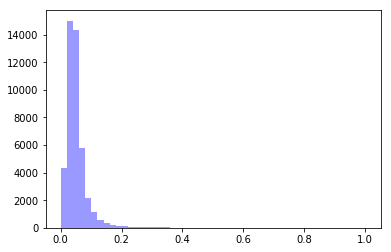

In [176]:
sns.distplot(ps, kde=False, color="b")

In [177]:
np.mean(ps)

0.053164090524529924

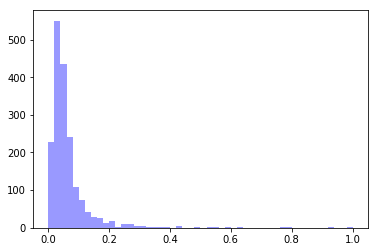

In [178]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df[_df['rewards'] == 1])
sns.distplot(ps, kde=False, color="b")

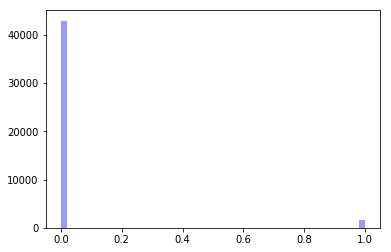

In [179]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)
sns.distplot(ps_i, kde=False, color="b")

In [180]:
np.mean(ps_eval)

0.03835978835978836

In [181]:
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(_df)

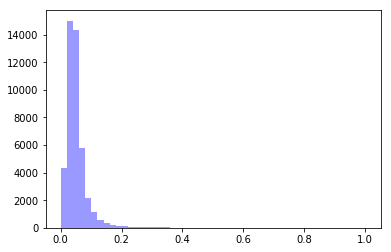

In [182]:
sns.distplot(ps, kde=False, color="b")

In [183]:
np.mean(ps)

0.053164090524529924

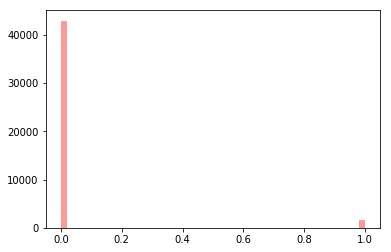

In [184]:
sns.distplot(ps_i, kde=False, color="r")

In [185]:
np.mean(ps_i)

0.03835978835978836

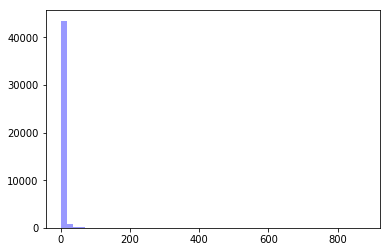

In [186]:
sw      = ps_i/ps
#sw, _, _ = _calc_sample_weigths(rewards,ps_eval, ps)
sns.distplot(sw, kde=False, color="b")

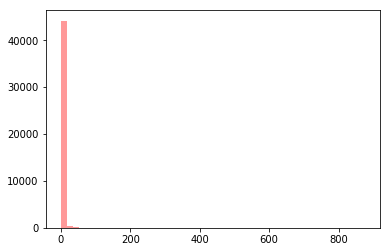

In [195]:
p_ratio = sw*rewards
#p_ratio = np.clip(p_ratio, a_min=None, a_max=1)

sns.distplot(p_ratio, kde=False, color="r")

0.2147701087810454


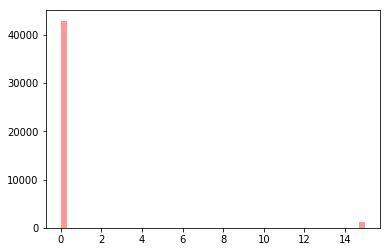

In [197]:
#p_ratio = sw*rewards
p_ratio = np.clip(sw, a_min=None, a_max=15)
print(np.mean(p_ratio * rewards))
sns.distplot(p_ratio, kde=False, color="r")

In [189]:
eval_IPS(rewards, ps_i, ps)

(0.4495189837179817, 0.826801441200049)

In [190]:
v = []
for i in range(1000):
   ips, _ =eval_CIPS(rewards, ps_i, ps, cap=i+1)
   v.append(ips)

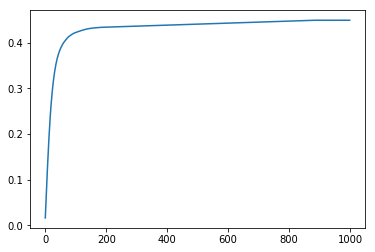

In [191]:
plt.plot(v)

#eval_IPS(rewards, ps_i, ps)

In [192]:
eval_IPS(rewards, ps_eval, ps)

(0.4495189837179817, 0.826801441200049)

In [193]:
eval_IPS(rewards, ps_i, ps)

(0.4495189837179817, 0.826801441200049)

In [194]:
eval_CIPS(rewards, ps_i, ps, cap=1)

(0.01616446955430006, 0.017260300746018038)

# DR

In [198]:
from IPython.display import Image
#Image("/home/marlesson/Downloads/Captura de tela de 2020-05-26 10-36-18.png")

In [199]:
def eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, 
                       t_props, l_props, cap=None):
  # t_props: Avaliação
  # l_props: Coleta

  # Calculate Sample Weigths
  p_ratio, n_e, cv =  _calc_sample_weigths(rewards, t_props, l_props)


  # Cap ratios
  if cap is not None:
    p_ratio = np.clip(p_ratio, a_min=None, a_max=cap)

  #################
  # Roubly Robust #
  #################
  dr = (p_ratio*(rewards - item_idx_rhat_rewards)) + action_rhat_rewards
  x1 = (rewards - item_idx_rhat_rewards)
  x2 = action_rhat_rewards
  #dr = (p_ratio*(rewards - item_idx_rhat_rewards)) + action_rhat_rewards

  confidence=0.95
  n = len(dr)
  m, se = np.mean(dr), scipy.stats.sem(dr)
  h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

  return dr, m, h, x1, x2

In [200]:
# sns.distplot(action_rhat_rewards, kde=False, color="b")
# sns.distplot(item_idx_rhat_rewards, kde=False, color="r")

In [201]:
# CRM
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(ps_model1)

crm_val = []
for i in range(1000):
    dr_r, dr, c, x1, x2 = eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_i, ps, cap=i)
    dr
    crm_val.append(dr)
    


In [202]:
# BCE
action_rhat_rewards, item_idx_rhat_rewards, \
    rewards, ps_eval, ps, ps_i = _offpolicy_eval(ps_model2)

bce_val = []
for i in range(1000):
    dr_r, dr, c, x1, x2 = eval_doubly_robust(action_rhat_rewards, item_idx_rhat_rewards, rewards, ps_i, ps, cap=i)
    dr
    bce_val.append(dr)

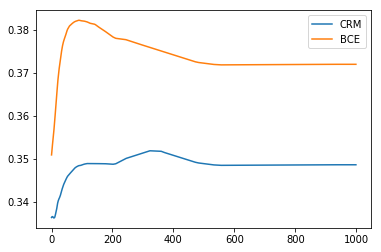

In [203]:
plt_crm = plt.plot(crm_val, label='CRM')
plt_bce = plt.plot(bce_val, label='BCE')
plt.legend()

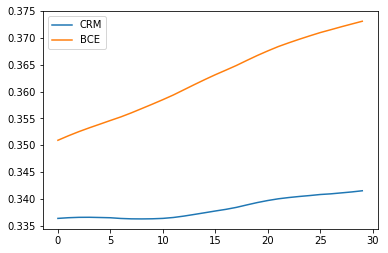

In [204]:
plt_crm = plt.plot(crm_val[:30], label='CRM')
plt_bce = plt.plot(bce_val[:30], label='BCE')
plt.legend()

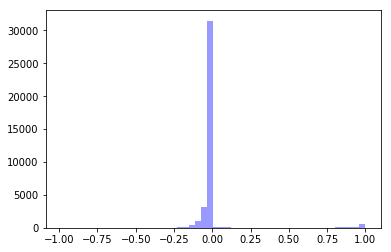

In [177]:
sns.distplot(x1, kde=False, color="b")

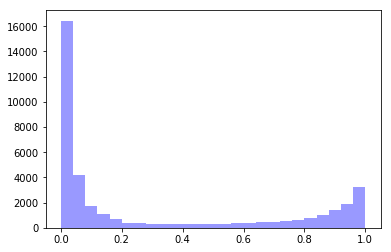

In [178]:
sns.distplot(x2, kde=False, color="b")

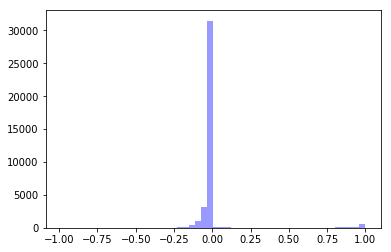

In [179]:
sns.distplot(x1, kde=False, color="b")

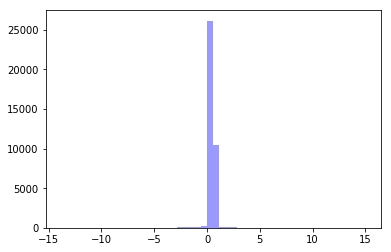

In [180]:
sns.distplot(dr_r, kde=False, color="b")

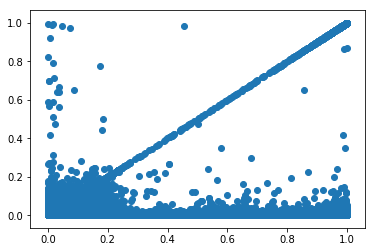

In [181]:
plt.scatter(action_rhat_rewards, item_idx_rhat_rewards)

In [182]:
np.mean(dr_r), dr, c

(0.34936907150936214, 0.34936907150936214, 0.01051716921791203)